<a href="https://colab.research.google.com/github/JoDeMiro/Micado-Optimizer-Test/blob/main/Auditor_for_Mylog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amik kellenek

```
2 [CPU:0]User%
4 [CPU:0]Sys%
5 [CPU:0]Wait%
9 [CPU:0]Idle%
10 [CPU:0]Total%

14 [CPU:0]User%
16 [CPU:0]Sys%
17 [CPU:0]Wait%
21 [CPU:0]Idle%
22 [CPU:0]Total%

ezekből majd -1
27 [DSK:sda]Reads
28 [DSK:sda]RMerge
29 [DSK:sda]RKBytes
30 [DSK:sda]WaitR
31 [DSK:sda]Writes
32 [DSK:sda]WMerge
33 [DSK:sda]WKbytes
34 [DSK:sda]WaitW
35 [DSK:sda]Request
36 [DSK:sda]QueLen
37 [DSK:sda]Wait
38 [DSK:sda]SvcTim
39 [DSK:sda]Util

40 [NUMA:0]Used

```


In [1]:
# Fonots

# Használathoz fel kell tölteni a mylog.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time

In [6]:
df = pd.read_csv('MyLog/mylog_1vcpu.log', sep=' ', header=1)

In [7]:
df.head()

,#Date,Time,[CPU:0]User%,[CPU:0]Nice%,[CPU:0]Sys%,[CPU:0]Wait%,[CPU:0]Irq%,[CPU:0]Soft%,[CPU:0]Steal%,[CPU:0]Idle%,...,[TCPD]OutTimeExcds,[TCPD]OutParmProbs,[TCPD]OutSrcQuenchs,[TCPD]OutRedirects,[TCPD]OutEchos,[TCPD]OutEchoReps,[TCPD]OutTimestamps,[TCPD]OutTimestampReps,[TCPD]OutAddrMasks,[TCPD]OutAddrMaskReps
0,20230504,21:00:51,0,0,1,0,0,0,0,99,...,0,0,0,0,0,0,0,0,0,0
1,20230504,21:00:52,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,0,0
2,20230504,21:00:53,2,0,2,1,0,1,0,94,...,0,0,0,0,0,0,0,0,0,0
3,20230504,21:00:54,6,0,1,0,0,1,0,92,...,0,0,0,0,0,0,0,0,0,0
4,20230504,21:00:55,10,0,3,0,0,1,0,86,...,0,0,0,0,0,0,0,0,0,0


In [8]:
ndf = df.copy()
ndf['#Date'] = pd.to_datetime(df['#Date'], format='%Y%m%d')
ndf['Time'] = pd.to_datetime(ndf['Time'], format='%H:%M:%S').dt.time

print(df.info())
ndf.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66397 entries, 0 to 66396
Columns: 105 entries, #Date to [TCPD]OutAddrMaskReps
dtypes: float64(1), int64(102), object(2)
memory usage: 53.2+ MB
None


,#Date,Time,[CPU:0]User%,[CPU:0]Nice%,[CPU:0]Sys%,[CPU:0]Wait%,[CPU:0]Irq%,[CPU:0]Soft%,[CPU:0]Steal%,[CPU:0]Idle%,...,[TCPD]OutTimeExcds,[TCPD]OutParmProbs,[TCPD]OutSrcQuenchs,[TCPD]OutRedirects,[TCPD]OutEchos,[TCPD]OutEchoReps,[TCPD]OutTimestamps,[TCPD]OutTimestampReps,[TCPD]OutAddrMasks,[TCPD]OutAddrMaskReps
0,2023-05-04,21:00:51,0,0,1,0,0,0,0,99,...,0,0,0,0,0,0,0,0,0,0
1,2023-05-04,21:00:52,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,0,0
2,2023-05-04,21:00:53,2,0,2,1,0,1,0,94,...,0,0,0,0,0,0,0,0,0,0


In [9]:
zdf = ndf.copy()

zdf['dt'] = ndf['#Date'].astype(str) + ' ' + df['Time'].astype(str).str.zfill(8)

zdf = zdf.rename(columns={'dt': 'datetime'})             # Egyszerű oszlopváltozó átnevezés dt -> datetime

zdf['datetime'] = pd.to_datetime(zdf['datetime'])        # Elkészült a datetime változó ez alapján indexelek majd

zdf['year']   = zdf['datetime'].dt.year
zdf['month']  = zdf['datetime'].dt.month
zdf['day']    = zdf['datetime'].dt.day
zdf['hour']   = zdf['datetime'].dt.hour
zdf['minute'] = zdf['datetime'].dt.minute
zdf['second'] = zdf['datetime'].dt.second

print(zdf['datetime'].min(), zdf['datetime'].max())      # Kezdő és Vég időpont
print(zdf['datetime'].max() - zdf['datetime'].min())     # Ekkora időtartamot fed le

zdf.head()

2023-05-04 21:00:51 2023-05-05 16:14:32
0 days 19:13:41


,#Date,Time,[CPU:0]User%,[CPU:0]Nice%,[CPU:0]Sys%,[CPU:0]Wait%,[CPU:0]Irq%,[CPU:0]Soft%,[CPU:0]Steal%,[CPU:0]Idle%,...,[TCPD]OutTimestampReps,[TCPD]OutAddrMasks,[TCPD]OutAddrMaskReps,datetime,year,month,day,hour,minute,second
0,2023-05-04,21:00:51,0,0,1,0,0,0,0,99,...,0,0,0,2023-05-04 21:00:51,2023,5,4,21,0,51
1,2023-05-04,21:00:52,0,0,0,0,0,0,0,100,...,0,0,0,2023-05-04 21:00:52,2023,5,4,21,0,52
2,2023-05-04,21:00:53,2,0,2,1,0,1,0,94,...,0,0,0,2023-05-04 21:00:53,2023,5,4,21,0,53
3,2023-05-04,21:00:54,6,0,1,0,0,1,0,92,...,0,0,0,2023-05-04 21:00:54,2023,5,4,21,0,54
4,2023-05-04,21:00:55,10,0,3,0,0,1,0,86,...,0,0,0,2023-05-04 21:00:55,2023,5,4,21,0,55


In [10]:
# [CPU:0]User% átlaga óránként

zdf.groupby([zdf['datetime'].dt.hour])['[CPU:0]User%'].mean()

datetime
0     0.933333
1     0.915000
2     1.035858
3     1.841840
4     0.808889
5     0.830278
6     9.538333
7     0.803611
8     2.712500
9     1.196389
10    1.530278
11    1.322778
12    0.922778
13    0.950833
14    0.933889
15    0.938611
16    0.927835
21    2.978586
22    0.972222
23    0.902778
Name: [CPU:0]User%, dtype: float64

Text(0, 0.5, '$CPU Usage \\%$')

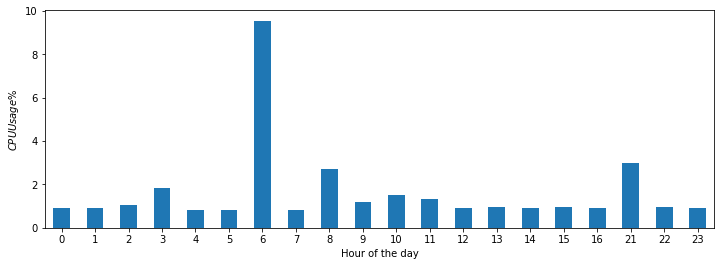

In [11]:
fig, axs = plt.subplots(figsize=(12, 4))

zdf.groupby([zdf['datetime'].dt.hour])['[CPU:0]User%'].mean().plot(
    kind='bar', rot=0, ax=axs
)
plt.xlabel("Hour of the day")
plt.ylabel("$CPU Usage \%$")

In [8]:
# Most nem használom, majd később, csak ide rakom

# pivot_table = zdf.pivot(index='datetime', columns='hour', values='[CPU:0]User%')

In [12]:
# A tdf a zdf idő alapján indexelt változata

# Erre azért lesz szükség mert meg akarom őrizni a df nem időindexelt változatát is

tdf = zdf.copy()

tdf = tdf.set_index('datetime')

tdf.index

DatetimeIndex(['2023-05-04 21:00:51', '2023-05-04 21:00:52',
               '2023-05-04 21:00:53', '2023-05-04 21:00:54',
               '2023-05-04 21:00:55', '2023-05-04 21:00:56',
               '2023-05-04 21:00:57', '2023-05-04 21:00:58',
               '2023-05-04 21:00:59', '2023-05-04 21:01:00',
               ...
               '2023-05-05 16:14:23', '2023-05-05 16:14:24',
               '2023-05-05 16:14:25', '2023-05-05 16:14:26',
               '2023-05-05 16:14:27', '2023-05-05 16:14:28',
               '2023-05-05 16:14:29', '2023-05-05 16:14:30',
               '2023-05-05 16:14:31', '2023-05-05 16:14:32'],
              dtype='datetime64[ns]', name='datetime', length=66397, freq=None)

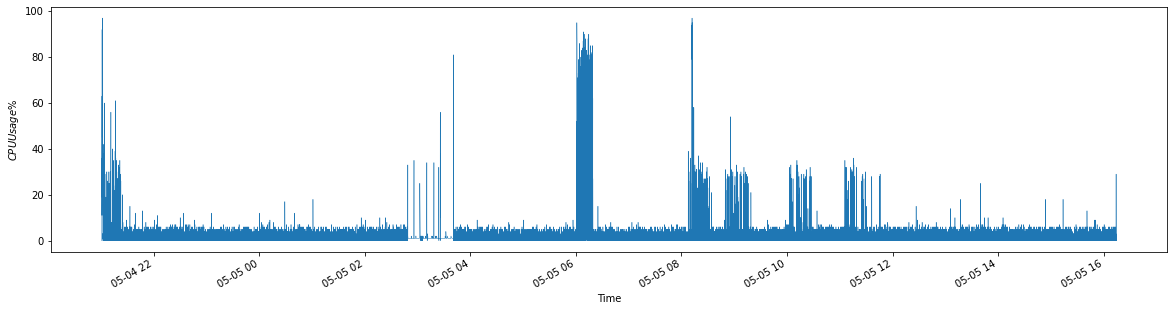

In [13]:
# Nagyon röviden így kell plottolni

plt.figure(figsize=(20,5))
tdf['[CPU:0]User%'].plot(linewidth=0.5)
plt.xlabel("Time")
plt.ylabel("$CPU Usage \%$")
plt.show()

In [20]:
# Igy lehet idő alapján szelektálni, szűrni az adatokat

tdf.loc['2020-04-01 13:12:10':'2023-05-05 13:12:14']

,#Date,Time,[CPU:0]User%,[CPU:0]Nice%,[CPU:0]Sys%,[CPU:0]Wait%,[CPU:0]Irq%,[CPU:0]Soft%,[CPU:0]Steal%,[CPU:0]Idle%,...,[TCPD]OutTimestamps,[TCPD]OutTimestampReps,[TCPD]OutAddrMasks,[TCPD]OutAddrMaskReps,year,month,day,hour,minute,second
datetime,,,,,,,,,,,,,,,,,,,,,
2023-05-04 21:00:51,2023-05-04,21:00:51,0,0,1,0,0,0,0,99,...,0,0,0,0,2023,5,4,21,0,51
2023-05-04 21:00:52,2023-05-04,21:00:52,0,0,0,0,0,0,0,100,...,0,0,0,0,2023,5,4,21,0,52
2023-05-04 21:00:53,2023-05-04,21:00:53,2,0,2,1,0,1,0,94,...,0,0,0,0,2023,5,4,21,0,53
2023-05-04 21:00:54,2023-05-04,21:00:54,6,0,1,0,0,1,0,92,...,0,0,0,0,2023,5,4,21,0,54
2023-05-04 21:00:55,2023-05-04,21:00:55,10,0,3,0,0,1,0,86,...,0,0,0,0,2023,5,4,21,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-05 13:12:10,2023-05-05,13:12:10,1,0,0,0,0,0,0,99,...,0,0,0,0,2023,5,5,13,12,10
2023-05-05 13:12:11,2023-05-05,13:12:11,1,0,0,0,0,0,0,99,...,0,0,0,0,2023,5,5,13,12,11
2023-05-05 13:12:12,2023-05-05,13:12:12,1,0,0,0,0,0,0,99,...,0,0,0,0,2023,5,5,13,12,12


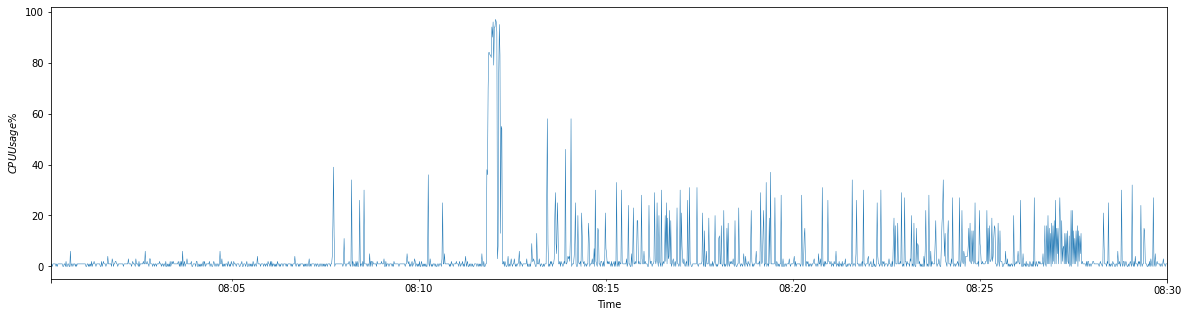

In [48]:
# Ugyan ez ha egy szeletét szeretném kirajzoltatni

plt.figure(figsize=(20,5))
tdf.loc['2023-05-05 08:00:10':'2023-05-05 08:30:00']['[CPU:0]User%'].plot(linewidth=0.5)
plt.xlabel("Time")
plt.ylabel("$CPU Usage \%$")
plt.show()

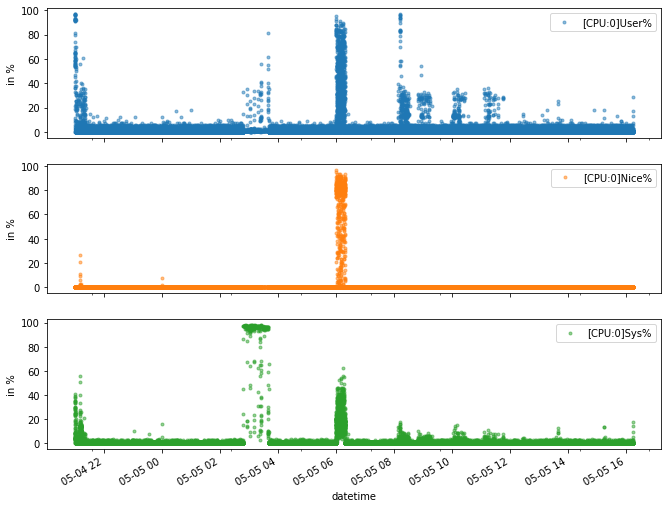

In [50]:
cols_plot = ['[CPU:0]User%','[CPU:0]Nice%','[CPU:0]Sys%']
axes = tdf[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('in %')

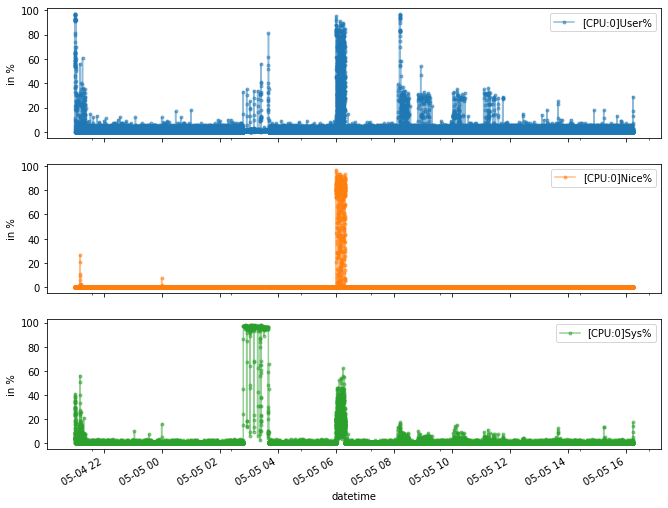

In [40]:
cols_plot = ['[CPU:0]User%','[CPU:0]Nice%','[CPU:0]Sys%']
axes = tdf[cols_plot].plot(marker='.', alpha=0.5, linestyle='-', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('in %')

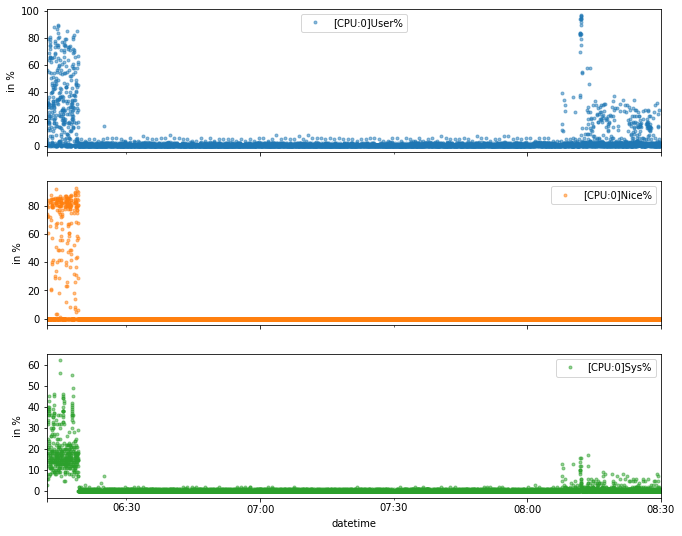

In [41]:
cols_plot = ['[CPU:0]User%','[CPU:0]Nice%','[CPU:0]Sys%']
axes = tdf.loc['2023-05-05 06:12:10':'2023-05-05 08:30:00'][cols_plot].plot(marker='.',
                                                                            alpha=0.5,
                                                                            linestyle='None',
                                                                            figsize=(11, 9),
                                                                            subplots=True)
for ax in axes:
    ax.set_ylabel('in %')

In [16]:
# Jó lenne megcsinálni a rolling moving average változót és a sequenced average változót is

# Roling average amikor mindíg az N hosszú átlagot nézi

# Sampled average amikor diszkrét nem átfedő időszakokra számolja ki az átlagot

# A Rolling average minden időpontra kiszámolható.

# A Sampled nem.
# Bár ábrázolhatnám, nagyon megtévesztő lenne, mert visszamenőlegesen nem ismerünk bizonyos értékeket.

In [42]:
# Resampling

# Most csak néhány oszlopon
data_columns = ['[CPU:0]User%','[CPU:0]Nice%','[CPU:0]Sys%']

# Resample to daily frequency, aggregating with mean
tdf_daily_mean = tdf[data_columns].resample('D').mean()
tdf_daily_std  = tdf[data_columns].resample('D').std()
tdf_daily_mean.head(3)

,[CPU:0]User%,[CPU:0]Nice%,[CPU:0]Sys%
datetime,,,
2023-05-04,1.611406,0.010234,0.491302
2023-05-05,1.690591,0.714707,1.026614


In [43]:
# Resampling

# Most csak néhány oszlopon
data_columns = ['[CPU:0]User%','[CPU:0]Nice%','[CPU:0]Sys%']

# Resample to 1 Minute frequency, aggregating with mean
tdf_minute_mean = tdf[data_columns].resample('1Min').mean()
tdf_minute_std  = tdf[data_columns].resample('1Min').std()
tdf_minute_mean.head(3)

,[CPU:0]User%,[CPU:0]Nice%,[CPU:0]Sys%
datetime,,,
2023-05-04 21:00:00,9.555556,0.0,3.444444
2023-05-04 21:01:00,67.166667,0.0,17.116667
2023-05-04 21:02:00,3.966667,0.0,0.450000


In [44]:
# Egy dataframbe teszem az átlagot és a szórást

tdf_minute = tdf_minute_mean.join(tdf_minute_std, lsuffix = 'mean', rsuffix = 'std')

tdf_minute.head(3)

,[CPU:0]User%mean,[CPU:0]Nice%mean,[CPU:0]Sys%mean,[CPU:0]User%std,[CPU:0]Nice%std,[CPU:0]Sys%std
datetime,,,,,,
2023-05-04 21:00:00,9.555556,0.0,3.444444,12.590781,0.0,3.844188
2023-05-04 21:01:00,67.166667,0.0,17.116667,22.672440,0.0,12.475184
2023-05-04 21:02:00,3.966667,0.0,0.450000,10.643637,0.0,1.015557


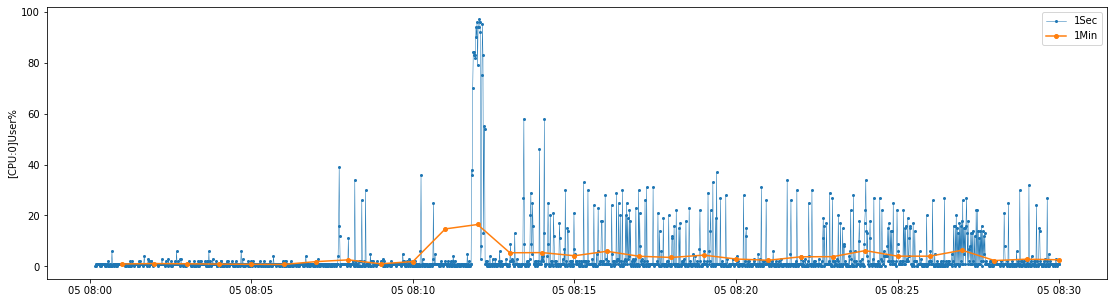

In [51]:
# Plottolom a másodperces és a perces aggregált átlagokat együtt

# Start and end of the date range to extract
start, end = '2023-05-05 08:00:10', '2023-05-05 08:30:00'

col_name = '[CPU:0]User%'

fig, ax = plt.subplots(figsize=(19, 5))

ax.plot(tdf.loc[start:end, col_name],
        marker='o', markersize=2, linestyle='-', linewidth=0.5, label='1Sec')

ax.plot(tdf_minute_mean.loc[start:end, col_name],
        marker='.', markersize=8, linestyle='-', linewidth=1.5, label='1Min')

ax.set_ylabel(str(col_name))
ax.legend();



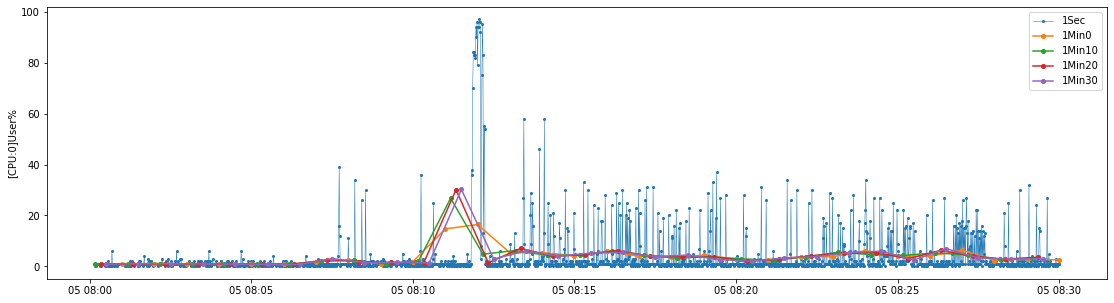

In [52]:
# Na igen,

# Itt rögtön látszik, hogy van egy kis baj, hogy pontosan mi alapján is csinálja meg az átlagokat a program.


# Resampling

# Most csak néhány oszlopon
data_columns = ['[CPU:0]User%','[CPU:0]Nice%','[CPU:0]Sys%']

# Resample to 1 Minute frequency, aggregating with mean
tdf_minute_mean_v0 = tdf[data_columns].resample('1Min', offset='0s').mean()
tdf_minute_mean_v1 = tdf[data_columns].resample('1Min', offset='10s').mean()
tdf_minute_mean_v2 = tdf[data_columns].resample('1Min', offset='20s').mean()
tdf_minute_mean_v3 = tdf[data_columns].resample('1Min', offset='30s').mean()

# Plottolom a másodperces és a perces aggregált átlagokat együtt

# Start and end of the date range to extract
start, end = '2023-05-05 08:00:10', '2023-05-05 08:30:00'


col_name = '[CPU:0]User%'

fig, ax = plt.subplots(figsize=(19, 5))

ax.plot(tdf.loc[start:end, col_name],
        marker='o', markersize=2, linestyle='-', linewidth=0.5, label='1Sec')

ax.plot(tdf_minute_mean_v0.loc[start:end, col_name],
        marker='.', markersize=8, linestyle='-', linewidth=1.5, label='1Min0')

ax.plot(tdf_minute_mean_v1.loc[start:end, col_name],
        marker='.', markersize=8, linestyle='-', linewidth=1.5, label='1Min10')

ax.plot(tdf_minute_mean_v2.loc[start:end, col_name],
        marker='.', markersize=8, linestyle='-', linewidth=1.5, label='1Min20')

ax.plot(tdf_minute_mean_v3.loc[start:end, col_name],
        marker='.', markersize=8, linestyle='-', linewidth=1.5, label='1Min30')

ax.set_ylabel(str(col_name))
ax.legend()

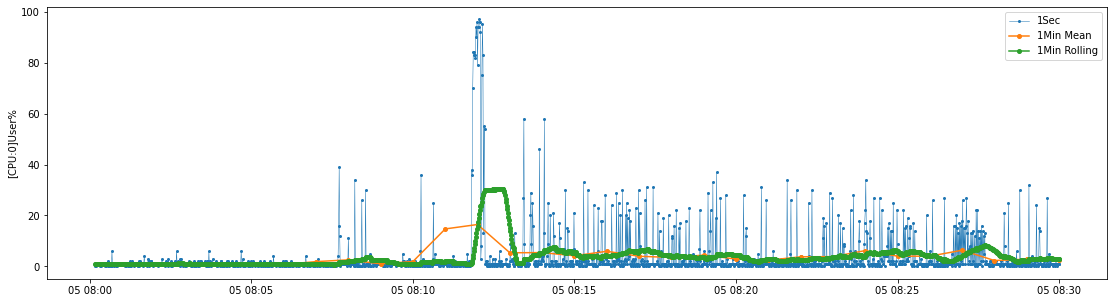

In [53]:
# Resampling

# Most csak néhány oszlopon
data_columns = ['[CPU:0]User%','[CPU:0]Nice%','[CPU:0]Sys%']

# Resample to 1 Minute frequency, aggregating with mean
tdf_minute_mean = tdf[data_columns].resample('1Min').mean()

# Compute the centered 7-day rolling mean
tdf_minute_rolling_mean = tdf[data_columns].rolling(60, center=False).mean()

# Start and end of the date range to extract
start, end = '2023-05-05 08:00:10', '2023-05-05 08:30:00'

col_name = '[CPU:0]User%'

fig, ax = plt.subplots(figsize=(19, 5))

ax.plot(tdf.loc[start:end, col_name],
        marker='o', markersize=2, linestyle='-', linewidth=0.5, label='1Sec')

ax.plot(tdf_minute_mean.loc[start:end, col_name],
        marker='.', markersize=8, linestyle='-', linewidth=1.5, label='1Min Mean')

ax.plot(tdf_minute_rolling_mean.loc[start:end, col_name],
        marker='.', markersize=8, linestyle='-', linewidth=1.5, label='1Min Rolling')

ax.set_ylabel(str(col_name))
ax.legend()


In [54]:
# Hogy is működik ez a resampling cucc?

res0 = tdf['[CPU:0]User%'].resample('5s', offset='0s').mean()
res5 = tdf['[CPU:0]User%'].resample('5s', offset='5s').mean()
origin = tdf['[CPU:0]User%']

print(res0.head())
print(res5.head())
print(origin.head(20))

# -------> Na jó, ez a jövő zenéze mert picit bonyolult

datetime
2023-05-04 21:00:50     2.0
2023-05-04 21:00:55    15.6
2023-05-04 21:01:00    43.4
2023-05-04 21:01:05    51.2
2023-05-04 21:01:10    71.0
Freq: 5S, Name: [CPU:0]User%, dtype: float64
datetime
2023-05-04 21:00:50     2.0
2023-05-04 21:00:55    15.6
2023-05-04 21:01:00    43.4
2023-05-04 21:01:05    51.2
2023-05-04 21:01:10    71.0
Freq: 5S, Name: [CPU:0]User%, dtype: float64
datetime
2023-05-04 21:00:51     0
2023-05-04 21:00:52     0
2023-05-04 21:00:53     2
2023-05-04 21:00:54     6
2023-05-04 21:00:55    10
2023-05-04 21:00:56     1
2023-05-04 21:00:57     8
2023-05-04 21:00:58    21
2023-05-04 21:00:59    38
2023-05-04 21:01:00    41
2023-05-04 21:01:01    54
2023-05-04 21:01:02    11
2023-05-04 21:01:03    56
2023-05-04 21:01:04    55
2023-05-04 21:01:05    63
2023-05-04 21:01:06    36
2023-05-04 21:01:07    19
2023-05-04 21:01:08    57
2023-05-04 21:01:09    81
2023-05-04 21:01:10    92
Name: [CPU:0]User%, dtype: int64


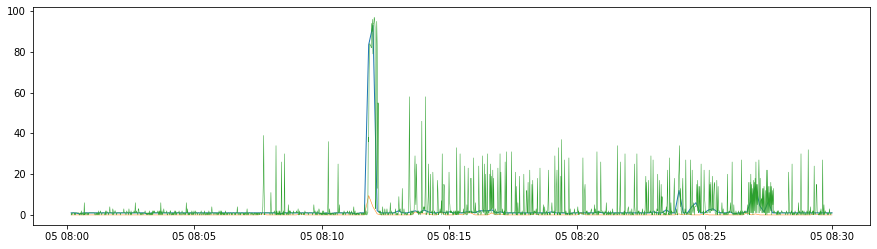

In [55]:
start, end = '2023-05-05 08:00:10', '2023-05-05 08:30:00'

# Start and end of the date range to extract

plt.figure(figsize=(15, 4))
plt.plot(tdf['[CPU:0]User%'].loc[start:end].resample('10s').median(), linestyle='-', linewidth=1.0)
plt.plot(tdf['[CPU:0]Sys%'].loc[start:end].resample('10s').median(), linestyle='-', linewidth=0.5)

plt.plot(tdf['[CPU:0]User%'].loc[start:end], linestyle='-', linewidth=0.5)
plt.show()

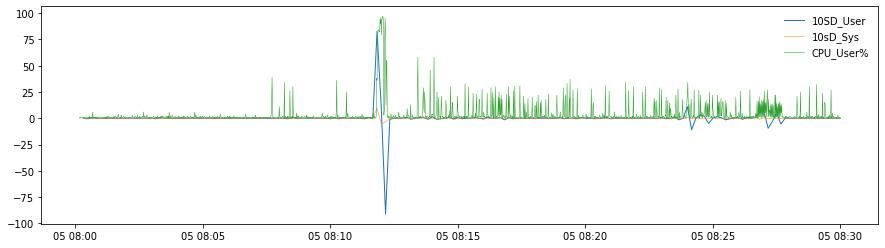

In [56]:
start, end = '2023-05-05 08:00:10', '2023-05-05 08:30:00'

plt.figure(figsize=(15, 4))
plt.plot(tdf['[CPU:0]User%'].loc[start:end].resample('10s').median().diff(), linestyle='-', linewidth=1.0, label='10SD_User')
plt.plot(tdf['[CPU:0]Sys%'].loc[start:end].resample('10s').median().diff(), linestyle='-', linewidth=0.5, label='10sD_Sys')

plt.plot(tdf['[CPU:0]User%'].loc[start:end], linestyle='-', linewidth=0.5, label='CPU_User%')
plt.legend(frameon=False)
plt.show()

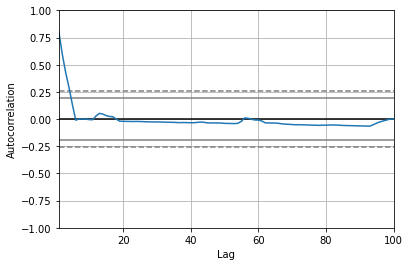

In [57]:
# Mi az autokorrelációja az mintavételezett mediánnak (nem a rollingnak) -> Amúgy ez teljesen felejtől

pd.plotting.autocorrelation_plot(tdf['[CPU:0]User%'].resample("10s").median()[0:100])

In [58]:
# Na innentől széepen végig iterálunk a mylog összes oszlopán

# Innentől már nincs újdonság csak annyi, hogy melyik váltzót
# lesz érdemes használni és minek mi a mérési szintje


print(len(tdf.columns))
print(len(ndf.columns))

# Ha mégis úgy döntök, hogy a tdf-et használom az ndf helyett

udf = tdf.copy()

# udf

111
105


In [59]:
udf.columns

Index(['#Date', 'Time', '[CPU:0]User%', '[CPU:0]Nice%', '[CPU:0]Sys%',
       '[CPU:0]Wait%', '[CPU:0]Irq%', '[CPU:0]Soft%', '[CPU:0]Steal%',
       '[CPU:0]Idle%',
       ...
       '[TCPD]OutTimestamps', '[TCPD]OutTimestampReps', '[TCPD]OutAddrMasks',
       '[TCPD]OutAddrMaskReps', 'year', 'month', 'day', 'hour', 'minute',
       'second'],
      dtype='object', length=111)

In [27]:
udf.describe()

,[CPU:0]User%,[CPU:0]Nice%,[CPU:0]Sys%,[CPU:0]Wait%,[CPU:0]Irq%,[CPU:0]Soft%,[CPU:0]Steal%,[CPU:0]Idle%,[CPU:0]Totl%,[CPU:0]Guest%,...,[TCPD]OutTimestamps,[TCPD]OutTimestampReps,[TCPD]OutAddrMasks,[TCPD]OutAddrMaskReps,year,month,day,hour,minute,second
count,76547.000000,76547.000000,76547.000000,76547.000000,76547.0,76547.000000,76547.000000,76547.000000,76547.000000,76547.0,...,76547.0,76547.0,76547.0,76547.0,76547.0,76547.0,76547.000000,76547.000000,76547.000000,76547.000000
mean,1.036187,0.105269,0.175317,0.111317,0.0,0.012241,0.000692,98.558768,1.329876,0.0,...,0.0,0.0,0.0,0.0,2022.0,4.0,13.621148,11.171058,29.342025,29.499406
std,6.539659,2.206336,1.451051,1.082424,0.0,0.125183,0.026304,8.177738,7.882657,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.485104,7.283886,17.433252,17.319557
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,2022.0,4.0,13.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,99.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,2022.0,4.0,13.000000,5.000000,14.000000,14.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,100.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,2022.0,4.0,14.000000,10.000000,29.000000,29.000000
75%,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,100.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,2022.0,4.0,14.000000,18.000000,44.000000,45.000000
max,100.000000,83.000000,44.000000,51.000000,0.0,6.000000,1.000000,100.000000,100.000000,0.0,...,0.0,0.0,0.0,0.0,2022.0,4.0,14.000000,23.000000,59.000000,59.000000


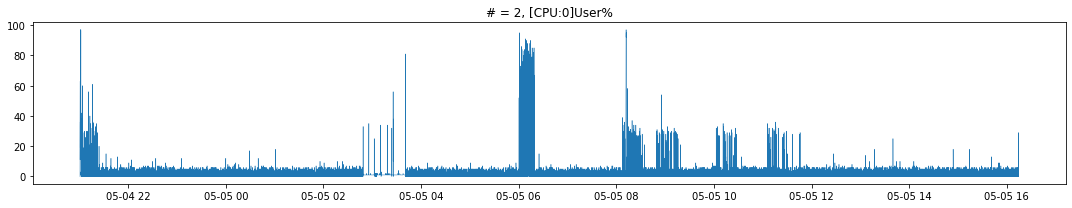

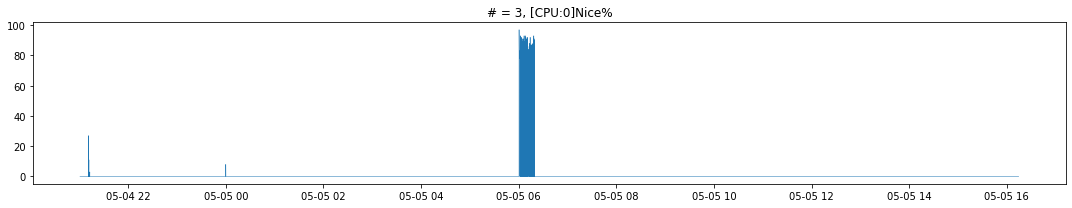

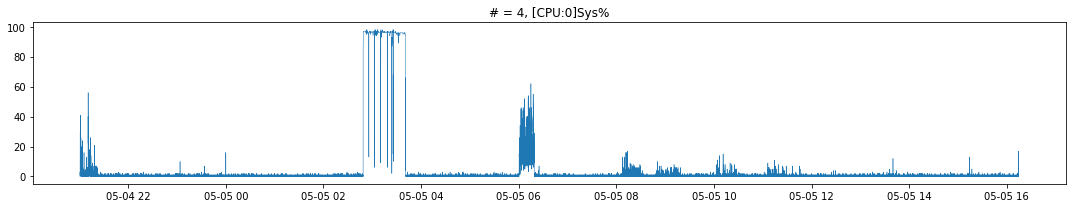

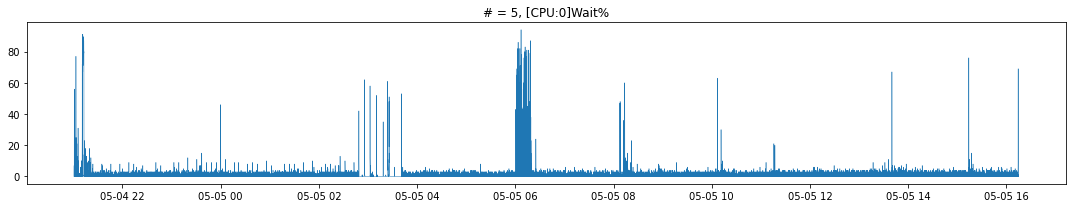

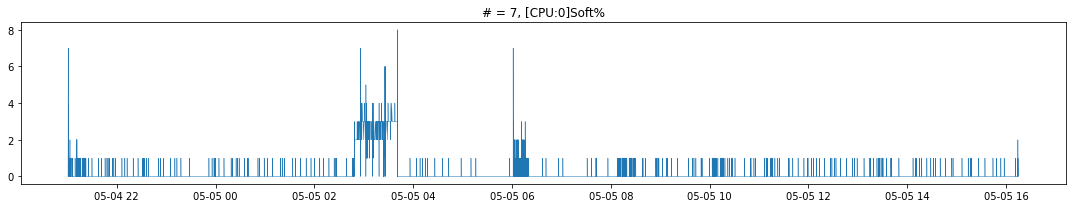

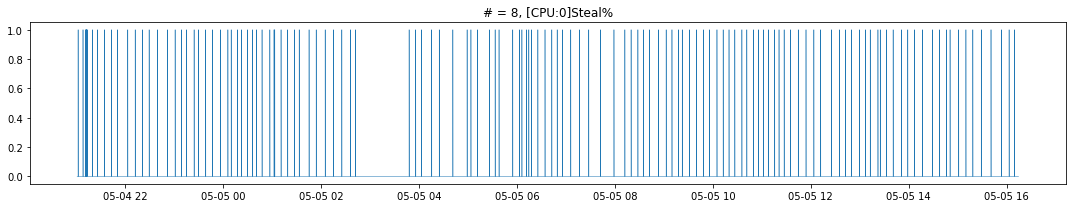

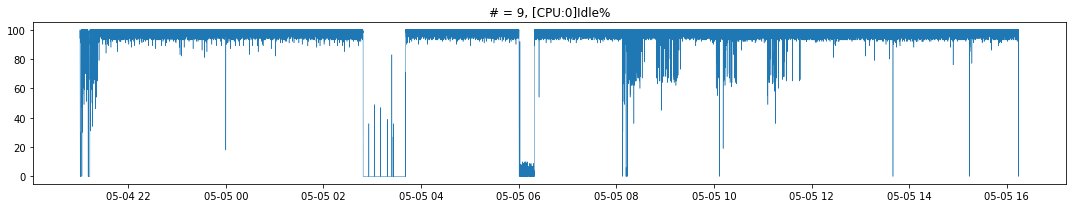

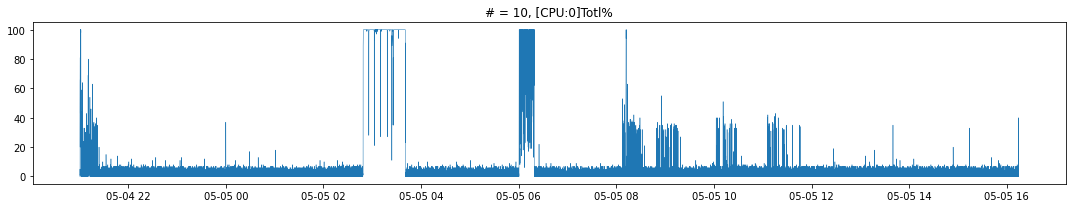

In [60]:
# CPU

# CPU-val vigyázni kell annyiszor csinálja meg ezeket a metrikákat ahány
# VCPU van, tehát ha a mögötte lévő instance 2 VCPU-t használ akkor kétszer
# -------------------------------------------------------------------------
# Ez egy potenciális hiba lehetőség,
# Mert ha olyan VM-et indítok ahol több VCPU is van, vagy nem pont két
# VCPU van akkor ezen itt nagyon el lehet majd csúszni.
# -------------------------------------------------------------------------

# 2 - User
# 3 - Nice
# 4 - Sys
# 5 - Wait
# 10 - Total

var_names = udf.columns

# for i in range(len(var_names)):
# i = 0 = #Date
# i = 1 = Time
for i in range(2, 14):
    if(udf[var_names[i]].describe()[2] > 0.0):
        plt.figure(figsize=(15, 3))
        plt.plot(udf[var_names[i]], linewidth=0.5)
        plt.title('# = ' + str(i) + ', ' + var_names[i])
        plt.tight_layout()
        plt.show()

In [61]:
# CPU - 2

# 14 - User%                     -----------> Ez jó (0-100) és elég
# 15 - Nice%
# 16 - Sys%
# 17 - Wait%
# 22 - Totl%                     -----------> Ez jó (0-100) és elég

var_names = udf.columns

# for i in range(len(var_names)):
# i = 0 = #Date
# i = 1 = Time
for i in range(14, 26):
    if(udf[var_names[i]].describe()[2] > 0.0):
        plt.figure(figsize=(15, 3))
        plt.plot(udf[var_names[i]], linewidth=0.5)
        plt.title('# = ' + str(i) + ', ' + var_names[i])
        plt.show()

TypeError: '>' not supported between instances of 'str' and 'float'

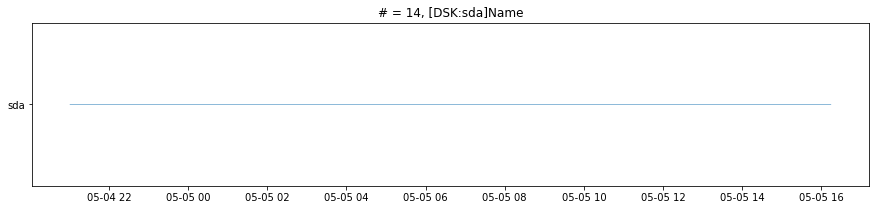

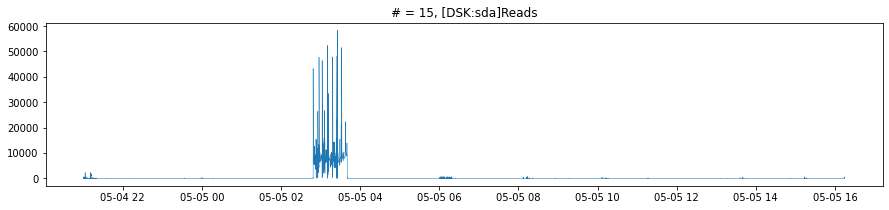

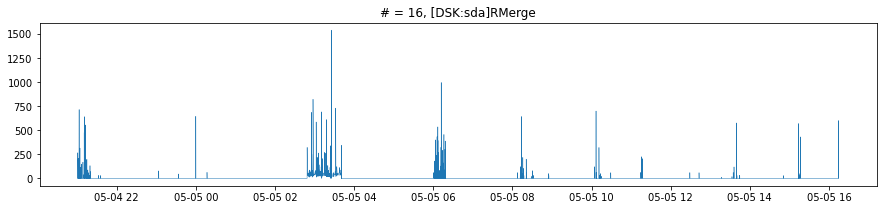

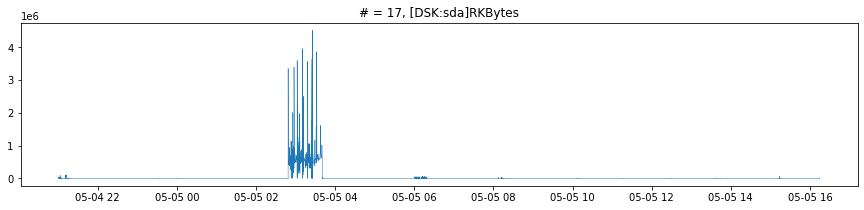

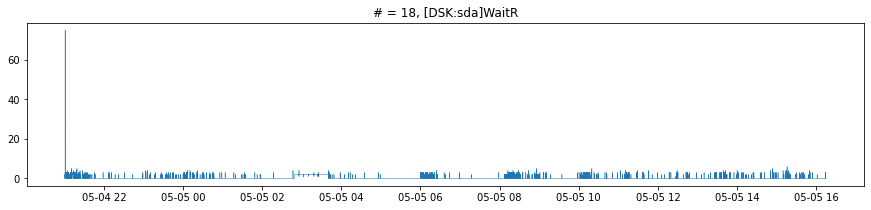

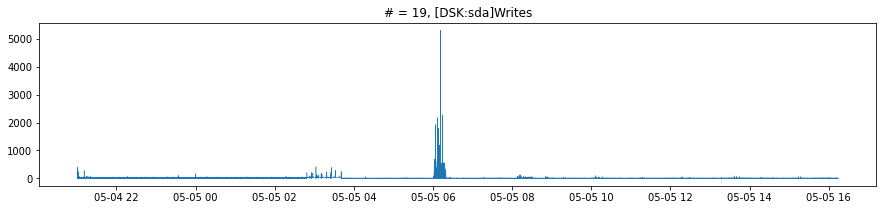

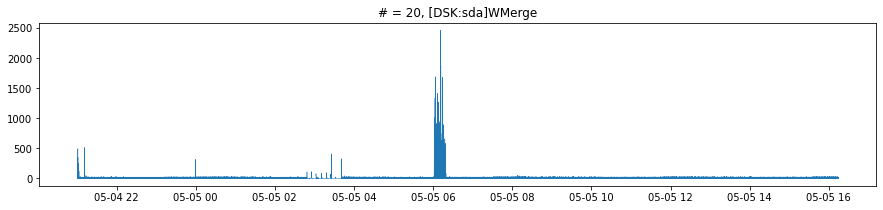

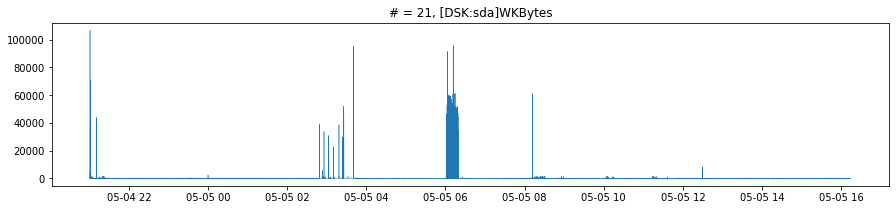

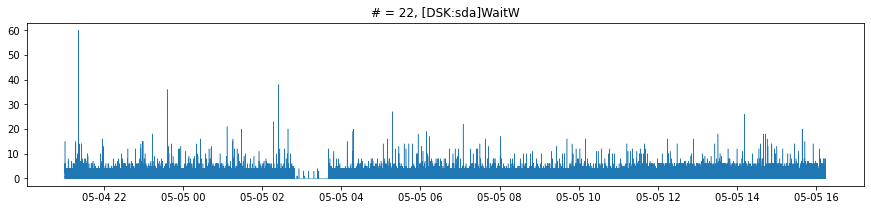

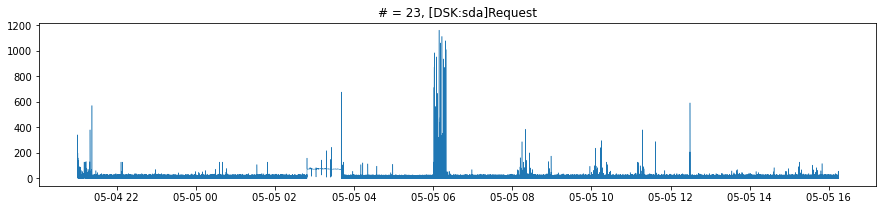

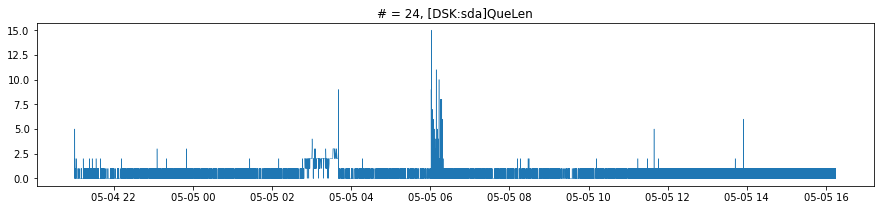

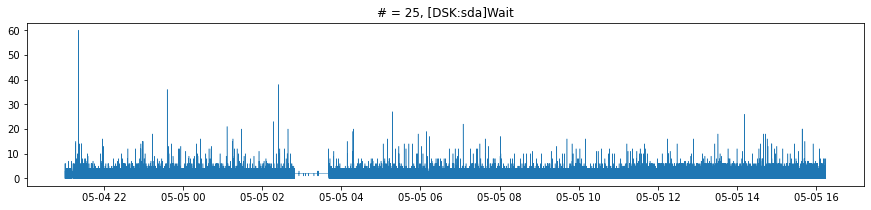

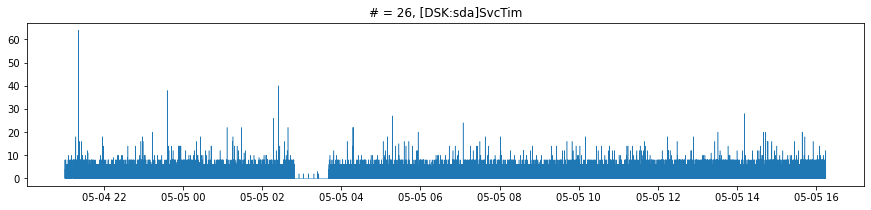

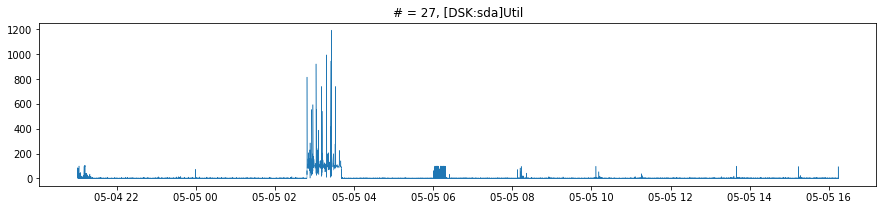

In [65]:
# -------------------------------------------------------------------------
# Vigyázni kell a számozással mert a Linux Scriptben majd ki fognak esni
# olyan változók amelyek String-ek
# Itt is van egy ilyen ami majd ki fog esni és emiatt elcsúszik a számozás
# -------------------------------------------------------------------------

# DSK

# 26 - name -> String -> ki fog esni
# 27 - Reads
# 29 - RKBytes
# 30 - WaitR
# 31 - Writes
# 32 - WMerge
# 33 - WKBytes
# 34 - WaitW
# 35 - Request
# 36 - QueLen
# 37 - Wait
# 38
# 39 - DskUtil -> ez tünik jó aggregátornak - 0-100 ---------------> ez elég lesz a többi (nem 0-100)

var_names = udf.columns

# for i in range(len(var_names)):
# i = 0 = #Date
# i = 1 = Time
for i in range(14, 28):
    plt.figure(figsize=(15, 3))
    plt.plot(udf[var_names[i]], linewidth=0.5)
    plt.title('# = ' + str(i) + ', ' + var_names[i])
    plt.show()

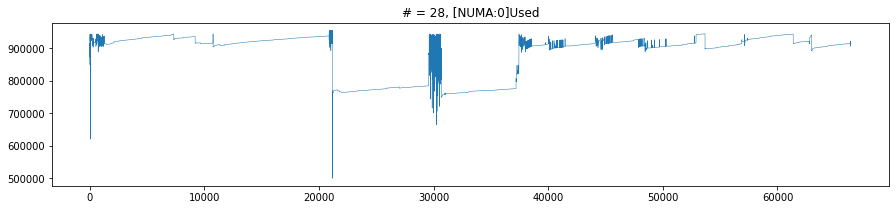

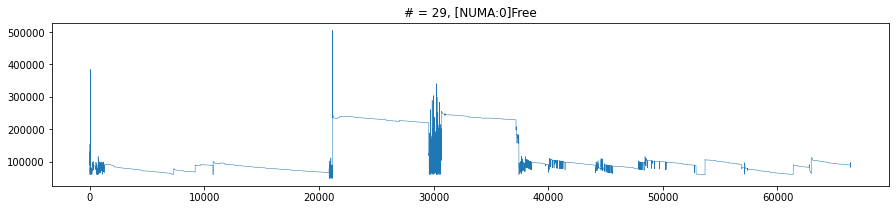

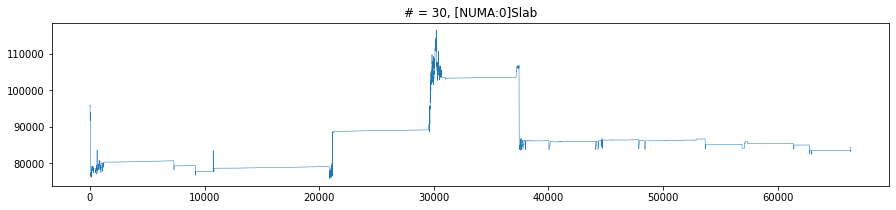

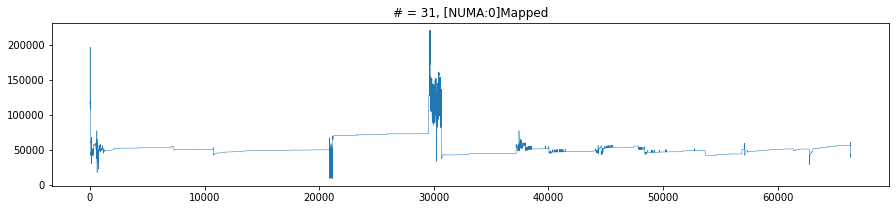

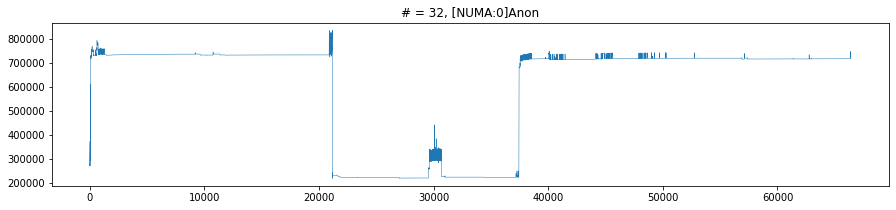

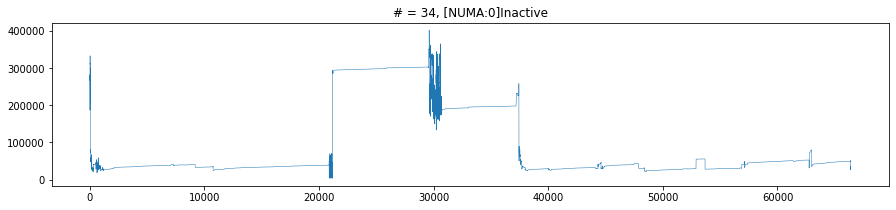

In [66]:
# -------------------------------------------------------------------------
# Vigyázni kell a számozással mert a Linux Scriptben majd ki fognak esni
# olyan változók amelyek String-ek
# Itt is van egy ilyen ami majd ki fog esni és emiatt elcsúszik a számozás
# -------------------------------------------------------------------------

# NUMA - Jó kérdés, hogy ez mi érdekes a Grafikonja

# ----------------> van itt néhány változó jó lenne tudni, hogy tudnám
# ----------------> átalakítani őket %-os formába
#-----------------> Ha fix az inicializált max akkor át tudom alakítani
# 40 - Used
# 41 - Free
# 42 - Slab
# 43 - Mapped
# 44 - Anon
# 45 - 48 -> constans


var_names = df.columns

# for i in range(len(var_names)):
# i = 0 = #Date
# i = 1 = Time
for i in range(28, 36):
    if(ndf[var_names[i]].describe()[2] > 0.0):
        plt.figure(figsize=(15, 3))
        plt.plot(df[var_names[i]], linewidth=0.5)
        plt.ticklabel_format(style='plain')
        plt.title('# = ' + str(i) + ', ' + var_names[i])
        plt.show()

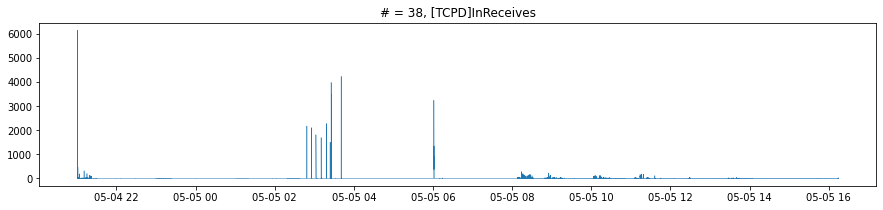

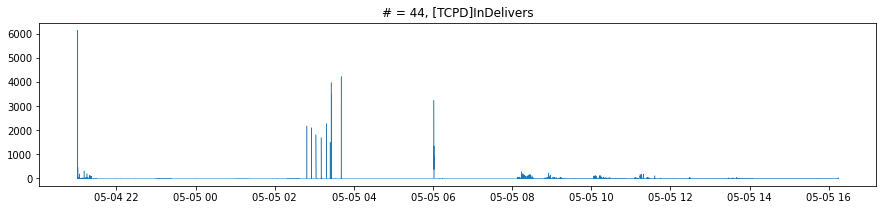

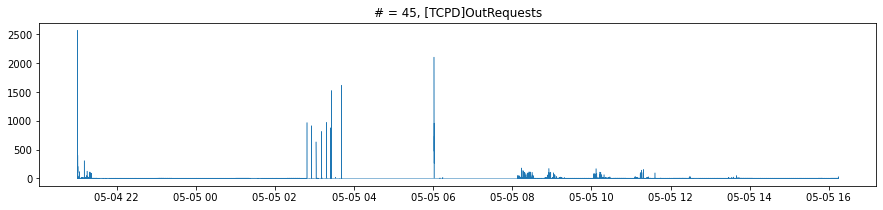

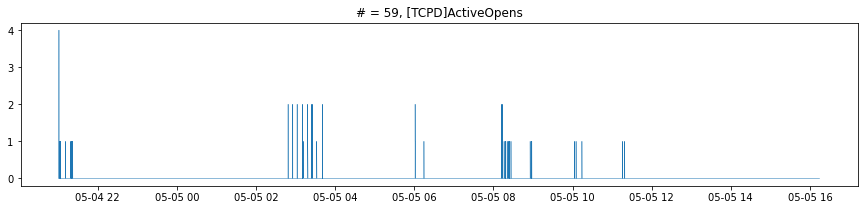

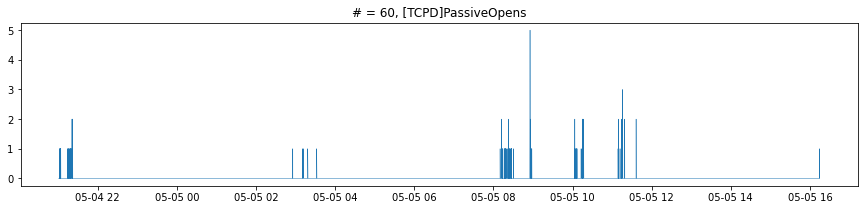

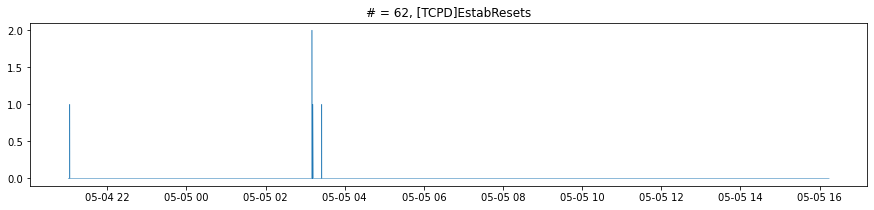

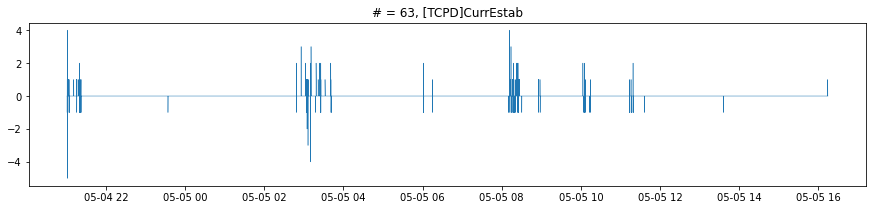

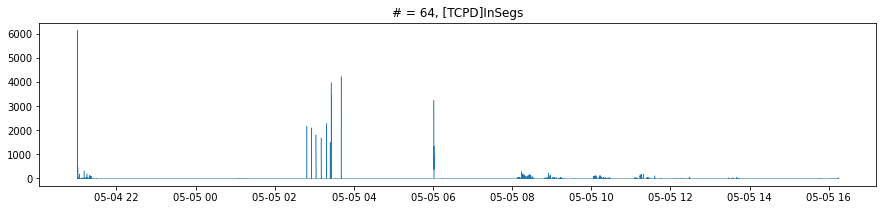

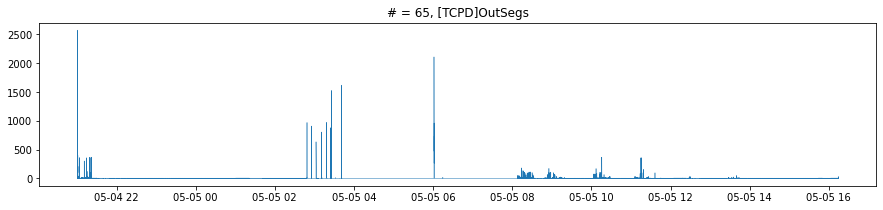

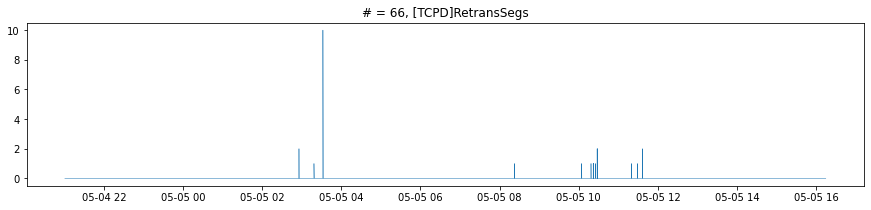

In [67]:
# -------------------------------------------------------------------------
# Vigyázni kell a számozással mert a Linux Scriptben majd ki fognak esni
# olyan változók amelyek String-ek
# Itt is van egy ilyen ami majd ki fog esni és emiatt elcsúszik a számozás
# -------------------------------------------------------------------------

# TCPD

# ----------------> van itt néhány változó jó lenne tudni, hogy tudnám
# ----------------> átalakítani őket %-os formába
#-----------------> Ha fix az inicializált max akkor át tudom alakítani
# 48 -> const
# 49 -> const
# 50 -> InReceives
# 51 - 55 -> const
# 56 - InDelivers
# 57 - OutRequests
# 70, 71, 72
#
# Vannak még érdekesek, valahogy az a bajom, hogy ezek csak a végén lettek
# vettek fel magas értéket
# Másik bajom, hogy ha ezek menet közben ilyen brutálisan magas érték
# felvételére képesek akkor el tudják majd vinnia a korábban 0-1 közé
# skálázott értékeket és az egész Neurális hálót.


var_names = df.columns

# for i in range(len(var_names)):
# i = 0 = #Date
# i = 1 = Time
for i in range(36, 68):
    if(udf[var_names[i]].describe()[2] > 0.0):
        plt.figure(figsize=(15, 3))
        plt.plot(udf[var_names[i]], linewidth=0.5)
        plt.title('# = ' + str(i) + ', ' + var_names[i])
        plt.show()

In [14]:
# -------------------------------------------------------------------------
# Vigyázni kell a számozással mert a Linux Scriptben majd ki fognak esni
# olyan változók amelyek String-ek
# Itt is van egy ilyen ami majd ki fog esni és emiatt elcsúszik a számozás
# -------------------------------------------------------------------------

# TCPD

# 72 fölött már csak TCPD van de használhatatlanok ezek az értékek,
# úgyhogy a későbbiekben ezekkel már nem foglalkozunk

# ------------------------------------------------------------------------
